In [1]:
import pandas as pd

In [2]:
import numpy as np

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

In [4]:
df_his_index

,Date,tech_weight,Open,High,Low,Close,Open_wi,High_wi,Low_wi,Close_wi,Timedelta_days,pro_change_close_wi
0,2014-01-02,18.666742,1845.86,1845.86,1827.74,1831.98,344.561924,344.561924,341.179510,341.970980,0,-0.751953
1,2014-01-03,18.575319,1833.21,1838.24,1829.13,1831.37,340.524605,341.458944,339.766732,340.182820,1,-0.522898
2,2014-01-06,18.617887,1832.31,1837.16,1823.73,1826.77,341.137405,342.040373,339.539991,340.105974,3,-0.022589
3,2014-01-07,18.672965,1828.71,1840.10,1828.71,1837.88,341.474378,343.601229,341.474378,343.186689,1,0.905810
4,2014-01-08,18.639790,1837.90,1840.02,1831.40,1837.49,342.580700,342.975864,341.369114,342.504277,1,-0.198846
...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,37.089590,5817.80,5817.80,5784.92,5809.86,2157.798167,2157.798167,2145.603110,2154.853254,1,0.014143
2564,2024-10-25,37.319370,5826.75,5862.82,5799.98,5808.12,2174.506391,2187.967488,2164.515996,2167.553793,1,0.589392
2565,2024-10-28,37.250240,5833.93,5842.92,5823.08,5823.52,2173.152926,2176.501723,2169.111275,2169.275176,3,0.079416
2566,2024-10-29,37.562030,5819.68,5847.19,5802.17,5832.92,2185.989948,2196.323262,2179.412836,2190.963160,1,0.999780


In [5]:
lst_date_we_care=df_his_index["Date"].to_list()

In [6]:
df_cop=pd.read_csv("../../raw/macro_daily/copper-prices-historical-chart-data.csv")

In [7]:
df_cop

,date,value
0,1959-07-02,0.2930
1,1959-07-06,0.2910
2,1959-07-07,0.2820
3,1959-07-08,0.2846
4,1959-07-09,0.2760
...,...,...
16494,2025-04-03,NaN
16495,2025-04-04,NaN
16496,2025-04-05,NaN
16497,2025-04-06,NaN


In [8]:
df_cop_care=df_cop[df_cop["date"].isin(lst_date_we_care)]

In [9]:
df_cop_care

,date,value
13631,2014-01-02,3.3815
13632,2014-01-03,3.3550
13633,2014-01-06,3.3595
13634,2014-01-07,3.3595
13635,2014-01-08,3.3425
...,...,...
16375,2024-10-24,4.3696
16376,2024-10-25,4.3664
16377,2024-10-28,4.3664
16378,2024-10-29,4.3632


In [10]:
lst_missing=list(set(lst_date_we_care)-set(df_cop_care["date"].to_list()))

In [11]:
lst_missing

['2023-11-22', '2014-12-30', '2014-03-05', '2023-11-21', '2015-01-28']

Above still have a lot of missing data.

In [12]:
df_cop_data=pd.DataFrame({"date": lst_date_we_care})

In [13]:
df_cop_data=df_cop_data.join(df_cop_care.set_index("date"), how="left", on="date")

In [14]:
df_cop_data["date"]=pd.to_datetime(df_cop_data["date"])

In [15]:
df_cop_data

,date,value
0,2014-01-02,3.3815
1,2014-01-03,3.3550
2,2014-01-06,3.3595
3,2014-01-07,3.3595
4,2014-01-08,3.3425
...,...,...
2563,2024-10-24,4.3696
2564,2024-10-25,4.3664
2565,2024-10-28,4.3664
2566,2024-10-29,4.3632


In [16]:
df_cop_data[df_cop_data[" value"].isnull()]

,date,value
42,2014-03-05,NaN
249,2014-12-30,NaN
253,2015-01-28,NaN
2331,2023-11-21,NaN
2332,2023-11-22,NaN


In [17]:
def v_datetime(df_in, str_date_col, str_col): 
    """
    Fill in data linearly
    
    :param df_in: A pandas dataframe. 
    :param str_date_col: the name of the column in df_in with dates (with type datetime). 
    :param str_col: the column whose value (floats) one wants to fill in linearly. 
    :return: the df_in but the null values of str_col are filled in linearly. 
    
    """
    lst_miss_index=df_in[df_in[str_col].isnull()].index.to_list()
    # lst_all_index=df_in.index.to_list()
    # lst_no_miss_index=[index for index in lst_all_index if index not in lst_miss_index]
    for index in lst_miss_index: 
        index_before=index
        index_after=index
        while index_before in lst_miss_index: 
            index_before-=1
        while index_after in lst_miss_index: 
            index_after+=1
        days_between=(df_in.loc[index_after][str_date_col]-df_in.loc[index_before][str_date_col]).days
        days_to=(df_in.loc[index][str_date_col]-df_in.loc[index_before][str_date_col]).days
        prop=days_to/days_between
        value_diff=df_in.loc[index_after][str_col]-df_in.loc[index_before][str_col]
        value=value_diff*prop+df_in.loc[index_before][str_col]
        df_in.at[index,str_col]=value
    return df_in

I will place above in proj_mod/fill_in_linearly.py 

In [18]:
v_datetime(df_cop_data,"date"," value")

,date,value
0,2014-01-02,3.3815
1,2014-01-03,3.3550
2,2014-01-06,3.3595
3,2014-01-07,3.3595
4,2014-01-08,3.3425
...,...,...
2563,2024-10-24,4.3696
2564,2024-10-25,4.3664
2565,2024-10-28,4.3664
2566,2024-10-29,4.3632


In [19]:
df_cop_data[df_cop_data["date"].isin(lst_missing)]

/tmp/ipykernel_283932/46395356.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_cop_data[df_cop_data["date"].isin(lst_missing)]


,date,value
42,2014-03-05,3.216250
249,2014-12-30,2.828650
253,2015-01-28,2.457000
2331,2023-11-21,3.804725
2332,2023-11-22,3.799950


In [20]:
df_cop[(df_cop["date"]=="2013-12-31")|(df_cop["date"]=="2014-01-01")]

,date,value
13630,2013-12-31,3.4055


In [21]:
df_cop.loc[13630][" value"]

3.4055

In [22]:
df_cop.loc[13631][" value"]

3.3815

In [23]:
lst_pro_change=[(np.sqrt(df_cop.loc[13631][" value"]/df_cop.loc[13630][" value"])-1)*100]

In [24]:
lst_pro_change

[-0.35299418877962063]

In [25]:
for index in range(1,2568): 
    lst_pro_change.append((df_cop_data.loc[index][" value"]/df_cop_data.loc[index-1][" value"]-1)*100)

In [26]:
df_cop_data["pro_change"]=lst_pro_change

In [27]:
df_cop_data

,date,value,pro_change
0,2014-01-02,3.3815,-0.352994
1,2014-01-03,3.3550,-0.783676
2,2014-01-06,3.3595,0.134128
3,2014-01-07,3.3595,0.000000
4,2014-01-08,3.3425,-0.506028
...,...,...,...
2563,2024-10-24,4.3696,0.886590
2564,2024-10-25,4.3664,-0.073233
2565,2024-10-28,4.3664,0.000000
2566,2024-10-29,4.3632,-0.073287


In [28]:
df_cop_data[df_cop_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,2.6615,6.294181


In [29]:
df_cop[df_cop["date"]=="2017-07-05"]

,date,value
14510,2017-07-05,2.66


In [30]:
df_cop_data.at[737,"pro_change"]=(df_cop_data.loc[737][" value"]/df_cop.loc[14510][" value"]-1)*100

In [31]:
df_cop_data[df_cop_data["date"]=="2017-07-06"]

,date,value,pro_change
737,2017-07-06,2.6615,0.056391


In [32]:
df_cop_data.to_csv("../../processed/cop_daily_we_care.csv")

In [33]:
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

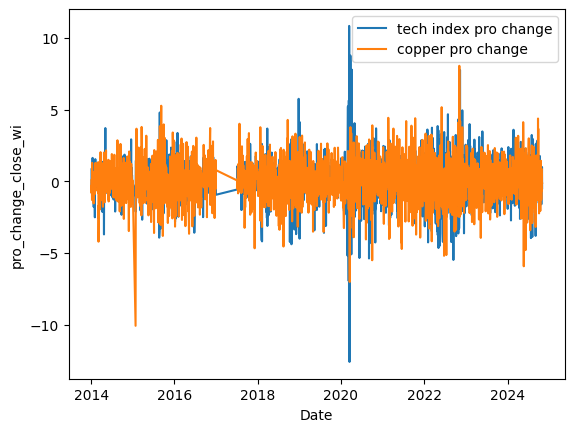

In [35]:
sns.lineplot(data=df_his_index, x="Date", y="pro_change_close_wi", label="tech index pro change")
sns.lineplot(data=df_cop_data, x="date", y="pro_change", label="copper pro change")
plt.show()